# How to avoid car accidents: A study of US accidents from 2016 to 2020

The main goal of this project is to analyse US accidents data, obtained from [kaggle.com](https://www.kaggle.com/sobhanmoosavi/us-accidents) in November 2020. This dataset holds data from 2016 to 2020.

## Table of Contents
1. [Business Understanding](#b_und)

2. [Data Understanding](#data_und)

3. [Data Preparation](#data_prep)

4. [Results](#results)

5. [Conclusion](#conclusion)

## <a id="b_und"/> Business Understanding

This dataset provides data related to US countrywide traffic accidents. Among the data there are some very interesting details as weather conditions, the description of the accident, where the accident took place and it's the surroundings. When I discovered this dataset, many questions came to my mind. Specially in how we can extract common information about the accidents that may give us some hint on what drivers should pay most attention. Considering this goal, I plan to answer the following questions:

1. [Where do most accidents happen?](#where)
    - Where the accidents happen countrywide? Do some regions have more accidents than other? 
    
    
2. [What are the surroundings of the accidents?](#surroundings)
    - Do the accidents take place in juntions? Proximity to traffic objects 
    
       
    
3. [When do most accidents happen?](#when)
    - Is there a specific time of the day where there are more accidents reported? Hours with the most traffic(the beginning of the day and the end of the day)? 
    - How many accidents do we have per month? What about per year? 
    
    
    
4. [What relates to accident severity?](#severity)
    - Is it related to where the accident happens?
    - Is it related to the weather conditions?
    - What variables correlate the most with a severity of an accident

## <a id="data_und"/> Data Understanding

To begin with, I am going to load the necessary libraries and to take a broader look at the data, in order to understand it better. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
#Loading the dataset
df = pd.read_csv('../US_Accidents/US_Accidents_June20.csv')
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [3]:
#Length of the dataset
len(df)

3513617

This is a large dataset, having 3.5 millions records

In [4]:
#Checking the type of variable of each column
df.dtypes

ID                        object
Source                    object
TMC                      float64
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitat

Here we have some very important information. 

There are some numerical columns: the accident severity (Severity), the coordinates of the accident (Start_Lat, End_Lat, Start_Lng and End_Lng) and some of the weather conditions(Temperature(F), Wind_Chill(F), Humidity(%), Pressure(in), Visibility(mi)). 

There are also some categorical variables as the information about the location of the accident (Street, City, County, State, Timezone). The Time variable is also categorical. We might have to rearrange this data to separate the day of accident from the time of the accident. 

Finally, there are soe boolean variables related to whe surroundings of the accident (Amenity, Bump, Crossing, Give_Way, Junction, No_Exit, Railway, Roundabout, Station, Stop, Traffic_Calming, Traffic_Signal, Turning_Loop). 

What is the TMC column? Why is Time categorical? What does the distance variable represents?

In [5]:
df['TMC'].value_counts()

201.0    2080341
241.0     249852
245.0      40338
229.0      22932
203.0      17639
222.0      13154
244.0      12185
406.0      11109
246.0       7118
343.0       6930
202.0       6298
247.0       4775
236.0       2121
206.0       1274
248.0       1025
339.0        920
341.0        592
336.0         89
200.0         66
239.0         54
351.0          6
Name: TMC, dtype: int64

Checking the dataset info in Kaggle it is possible to conclude that the TMC is the Traffic Message Channel code which provides more detailed description of the accident. 

In [6]:
print(df.Start_Time)

0          2016-02-08 05:46:00
1          2016-02-08 06:07:59
2          2016-02-08 06:49:27
3          2016-02-08 07:23:34
4          2016-02-08 07:39:07
                  ...         
3513612    2019-08-23 18:03:25
3513613    2019-08-23 19:11:30
3513614    2019-08-23 19:00:21
3513615    2019-08-23 19:00:21
3513616    2019-08-23 18:52:06
Name: Start_Time, Length: 3513617, dtype: object


The Start Time variable has both the date and the time, as expected





In [7]:
df['Distance(mi)'].value_counts()

0.000     2457174
0.010      250988
0.010       13359
0.020        5968
0.001        5528
           ...   
9.356           1
7.967           1
9.269           1
6.688           1
16.911          1
Name: Distance(mi), Length: 13476, dtype: int64

The distance variable represents the lenght of the road affected by the accident

In [8]:
#Check the percentage of missing values in each column

columns = df.columns

for column in columns:
    print(column)
    print(df[column].isna().mean())
    print()

ID
0.0

Source
0.0

TMC
0.29451104090172603

Severity
0.0

Start_Time
0.0

End_Time
0.0

Start_Lat
0.0

Start_Lng
0.0

End_Lat
0.7054889590982739

End_Lng
0.7054889590982739

Distance(mi)
0.0

Description
2.84607001844538e-07

Number
0.6440269386219386

Street
0.0

Side
0.0

City
3.187598420658825e-05

County
0.0

State
0.0

Zipcode
0.0003042448849718111

Country
0.0

Timezone
0.0011042751671568073

Airport_Code
0.0019233741184653877

Weather_Timestamp
0.01233002914091092

Temperature(F)
0.01870778744524517

Wind_Chill(F)
0.5317167465890562

Humidity(%)
0.01983340813754032

Pressure(in)
0.01590440847707647

Visibility(mi)
0.021589148731919274

Wind_Direction
0.01675595262659533

Wind_Speed(mph)
0.12938490450154358

Precipitation(in)
0.5765779252548016

Weather_Condition
0.021669407906439432

Amenity
0.0

Bump
0.0

Crossing
0.0

Give_Way
0.0

Junction
0.0

No_Exit
0.0

Railway
0.0

Roundabout
0.0

Station
0.0

Stop
0.0

Traffic_Calming
0.0

Traffic_Signal
0.0

Turning_Loop
0.0

Sunrise_

Looking at the numbers above, we can see that the Traffic Message Channel code has a 0.29% of missing values, that most of the accidents don't have a End Latitude and Longitude and that some of the weather condition also have some missing values. 


## <a id="data_prep"/> Data Preparation

In this section, I am going to separate the data in different subdatasets, in order to answer the business questions.  

In [9]:
columns = df.columns
print(columns)

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')


In [10]:
#The first question: Where do most accidents happen
df_where = df[['ID','Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng','City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Severity']]

In this first question, we want to consider every available information, so we are not going to remove any missing data from this columns

In [11]:
#The second question: The surroundings of the accidents
df_surr = df[['Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']]


From the infomation above, we know that these columns do not have missing data

In [12]:
#The third question: When do most accidents happen?
df_when = df[['ID', 'Start_Time', 'End_Time', 'Severity']]

For this question, we also know there is no missing data. Nonetheless, we have to separate the date and time of the accident, to answer the question.

In [14]:
df_when['Start_Date'] = pd.to_datetime(df_when['Start_Time']).dt.date
df_when['Start_Time_1'] = pd.to_datetime(df_when['Start_Time']).dt.time
df_when['End_Date'] = pd.to_datetime(df_when['End_Time']).dt.date
df_when['End_Time_1'] = pd.to_datetime(df_when['End_Time']).dt.time



<ipython-input-14-807469b0fbef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_when['Start_Date'] = pd.to_datetime(df_when['Start_Time']).dt.date
<ipython-input-14-807469b0fbef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_when['Start_Time_1'] = pd.to_datetime(df_when['Start_Time']).dt.time
<ipython-input-14-807469b0fbef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [15]:
print(df_when)

                ID           Start_Time             End_Time  Severity  \
0              A-1  2016-02-08 05:46:00  2016-02-08 11:00:00         3   
1              A-2  2016-02-08 06:07:59  2016-02-08 06:37:59         2   
2              A-3  2016-02-08 06:49:27  2016-02-08 07:19:27         2   
3              A-4  2016-02-08 07:23:34  2016-02-08 07:53:34         3   
4              A-5  2016-02-08 07:39:07  2016-02-08 08:09:07         2   
...            ...                  ...                  ...       ...   
3513612  A-3513776  2019-08-23 18:03:25  2019-08-23 18:32:01         2   
3513613  A-3513777  2019-08-23 19:11:30  2019-08-23 19:38:23         2   
3513614  A-3513778  2019-08-23 19:00:21  2019-08-23 19:28:49         2   
3513615  A-3513779  2019-08-23 19:00:21  2019-08-23 19:29:42         2   
3513616  A-3513780  2019-08-23 18:52:06  2019-08-23 19:21:31         2   

         Start_Date Start_Time_1    End_Date End_Time_1  
0        2016-02-08     05:46:00  2016-02-08   11:00:

In [16]:
#The final question: What relates to accident severity?

#Extract to a new df the numerical variables
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df_severity = df.select_dtypes(include=numerics)

Here, we are going to focus on numerical values, to see if they have some correlation to severity

In [17]:
#Remove the columns in question
df_severity = df_severity.drop(columns = ['Start_Lat', 'Start_Lng', 'End_Lat','End_Lng','Number'])

From those numerical values, we're going to remove the coordinates and the number, as the dataset of the 'where' question, can also be used to map severity

In [18]:
columns = df_severity.columns
print(columns)
for column in columns:
    print(column)
    print(df_severity[column].isna().mean())
    print()

Index(['TMC', 'Severity', 'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)'],
      dtype='object')
TMC
0.29451104090172603

Severity
0.0

Distance(mi)
0.0

Temperature(F)
0.01870778744524517

Wind_Chill(F)
0.5317167465890562

Humidity(%)
0.01983340813754032

Pressure(in)
0.01590440847707647

Visibility(mi)
0.021589148731919274

Wind_Speed(mph)
0.12938490450154358

Precipitation(in)
0.5765779252548016



From these number, we can see there are many missing values. We are going to remove them, in order to see how the accidents that have those columns filled correlate to the accident severity

In [19]:
#Removing missing data from those columns
df_severity = df_severity.dropna()

In [20]:
print(columns)
for column in columns:
    print(column)
    print(df_severity[column].isna().mean())
    print()

Index(['TMC', 'Severity', 'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)'],
      dtype='object')
TMC
0.0

Severity
0.0

Distance(mi)
0.0

Temperature(F)
0.0

Wind_Chill(F)
0.0

Humidity(%)
0.0

Pressure(in)
0.0

Visibility(mi)
0.0

Wind_Speed(mph)
0.0

Precipitation(in)
0.0



## <a id="results"/> Results

## <a id="where"/> Where do most accidents happen?


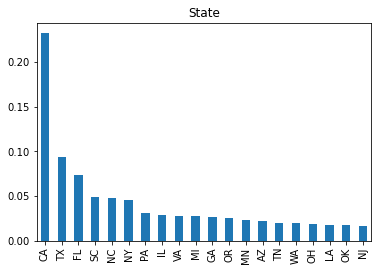

In [21]:
#Counting the number of accidents in each state
count_vals = df_where.State.value_counts()
state_names = count_vals.index.tolist()


(count_vals[:20]/df_where.shape[0]).plot(kind="bar");
plt.title("State");

In [22]:
print('Top 5 States with the most accidents:')
for i in range(5):
    print('{} has {:.2f}% of the accidents,which corresponds to {} accidents'.format(state_names[i],
                                                                                     count_vals[i]/df.shape[0], 
                                                                                     count_vals[i]))
    

Top 5 States with the most accidents:
CA has 0.23% of the accidents,which corresponds to 816825 accidents
TX has 0.09% of the accidents,which corresponds to 329284 accidents
FL has 0.07% of the accidents,which corresponds to 258002 accidents
SC has 0.05% of the accidents,which corresponds to 173277 accidents
NC has 0.05% of the accidents,which corresponds to 165958 accidents


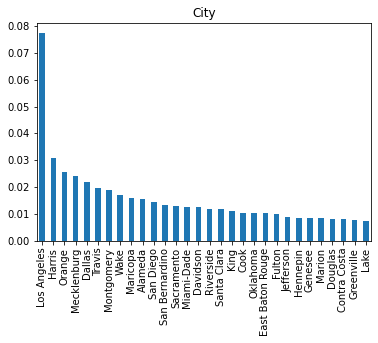

In [23]:
#Counting the number of accidents in each county
count_vals = df_where.County.value_counts()
county_names = count_vals.index.tolist()


(count_vals[:30]/df_where.shape[0]).plot(kind="bar");
plt.title("City");

In [24]:
print('Top 5 Cities with the most accidents:')
for i in range(5):
    print('{} has {:.3f}% of the accidents,which corresponds to {} accidents'.format(county_names[i],
                                                                                     count_vals[i]/df.shape[0], 
                                                                                     count_vals[i]))

Top 5 Cities with the most accidents:
Los Angeles has 0.077% of the accidents,which corresponds to 271627 accidents
Harris has 0.031% of the accidents,which corresponds to 107761 accidents
Orange has 0.025% of the accidents,which corresponds to 89349 accidents
Mecklenburg has 0.024% of the accidents,which corresponds to 84258 accidents
Dallas has 0.022% of the accidents,which corresponds to 76668 accidents


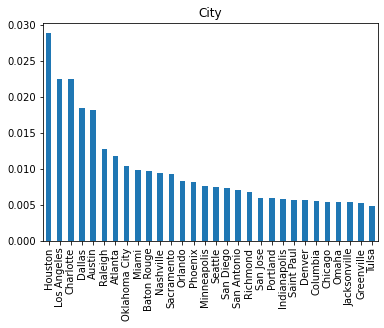

In [25]:
#Counting the number of accidents in each city
count_vals = df_where.City.value_counts()
city_names = count_vals.index.tolist()


(count_vals[:30]/df_where.shape[0]).plot(kind="bar");
plt.title("City");

In [26]:
print('Top 5 Cities with the most accidents:')
for i in range(5):
    print('{} has {:.3f}% of the accidents,which corresponds to {} accidents'.format(city_names[i],
                                                                                     count_vals[i]/df.shape[0], 
                                                                                     count_vals[i]))

Top 5 Cities with the most accidents:
Houston has 0.029% of the accidents,which corresponds to 101240 accidents
Los Angeles has 0.023% of the accidents,which corresponds to 79169 accidents
Charlotte has 0.022% of the accidents,which corresponds to 78952 accidents
Dallas has 0.018% of the accidents,which corresponds to 64790 accidents
Austin has 0.018% of the accidents,which corresponds to 63889 accidents


This information relates to the previous information about the states, as Dallas, Austin and Houston are cities from Texas, Los Angeles belongs to the State of California and Charlotte to North Carolina

In [27]:
BBox = ((df_where.Start_Lng.min(),   df_where.Start_Lng.max(),      
         df_where.Start_Lat.min(), df_where.Start_Lat.max()))
BBox

(-124.623833, -67.113167, 24.555269, 49.002201)

In [ ]:
us_map = plt.imread('./map_us.png')

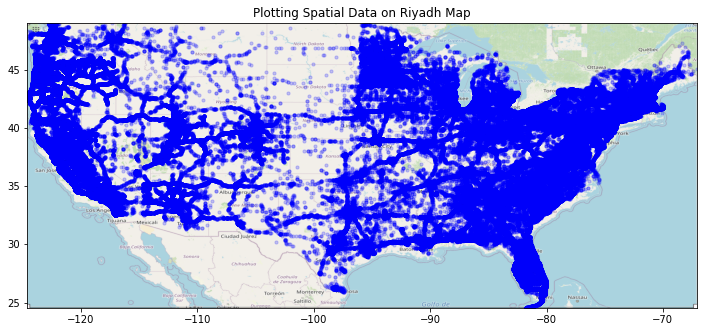

In [29]:
fig, ax = plt.subplots(figsize = (12,10))
ax.scatter(df_where.Start_Lng, df_where.Start_Lat, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data on Riyadh Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(us_map, zorder=0, extent = BBox, aspect= 'equal')

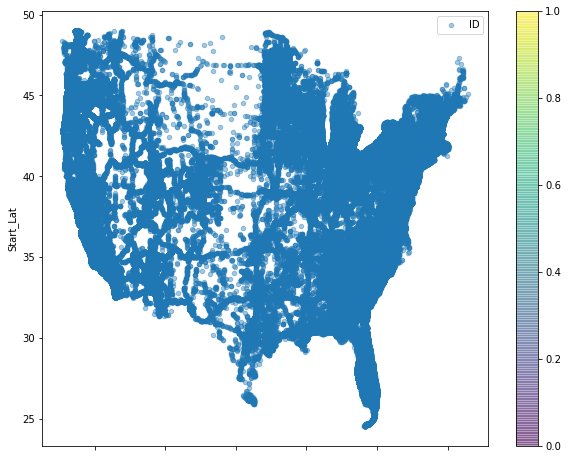

In [30]:
mapping_accidents=df_where.plot(kind='scatter', x='Start_Lng', y='Start_Lat',label = 'ID',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
mapping_accidents.legend()

## <a id="surroundings"/> What are the surroundings of the accidents?

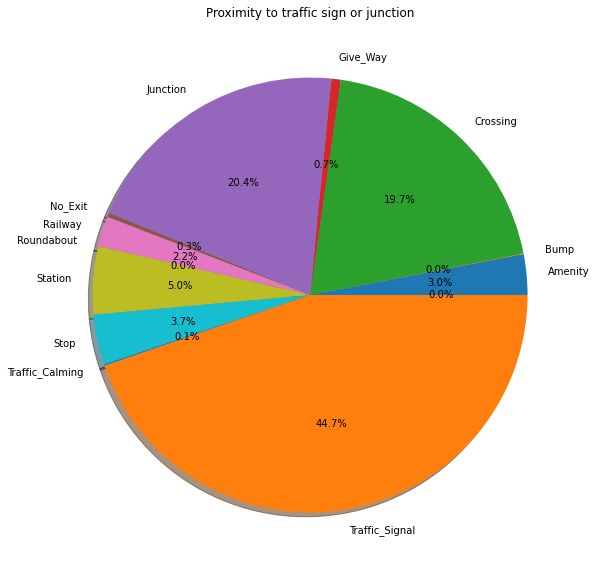

In [31]:
proximity = df_surr.sum(axis=0)
proximity.plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,10))
plt.ylabel('')
plt.title('Proximity to traffic sign or junction');

## <a id="when"/> When do most accidents happen?

In [32]:
df_when

,ID,Start_Time,End_Time,Severity,Start_Date,Start_Time_1,End_Date,End_Time_1
0,A-1,2016-02-08 05:46:00,2016-02-08 11:00:00,3,2016-02-08,05:46:00,2016-02-08,11:00:00
1,A-2,2016-02-08 06:07:59,2016-02-08 06:37:59,2,2016-02-08,06:07:59,2016-02-08,06:37:59
2,A-3,2016-02-08 06:49:27,2016-02-08 07:19:27,2,2016-02-08,06:49:27,2016-02-08,07:19:27
3,A-4,2016-02-08 07:23:34,2016-02-08 07:53:34,3,2016-02-08,07:23:34,2016-02-08,07:53:34
4,A-5,2016-02-08 07:39:07,2016-02-08 08:09:07,2,2016-02-08,07:39:07,2016-02-08,08:09:07
...,...,...,...,...,...,...,...,...
3513612,A-3513776,2019-08-23 18:03:25,2019-08-23 18:32:01,2,2019-08-23,18:03:25,2019-08-23,18:32:01
3513613,A-3513777,2019-08-23 19:11:30,2019-08-23 19:38:23,2,2019-08-23,19:11:30,2019-08-23,19:38:23
3513614,A-3513778,2019-08-23 19:00:21,2019-08-23 19:28:49,2,2019-08-23,19:00:21,2019-08-23,19:28:49
3513615,A-3513779,2019-08-23 19:00:21,2019-08-23 19:29:42,2,2019-08-23,19:00:21,2019-08-23,19:29:42


In [33]:
#Create hour column to group the data by hour of the day 
df_when['hour'] = pd.to_datetime(df_when['Start_Time']).dt.strftime('%b')

<ipython-input-33-5e5f609c350c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_when['hour'] = pd.to_datetime(df_when['Start_Time']).dt.strftime('%b')


In [34]:
df_when['hour']

0          Feb
1          Feb
2          Feb
3          Feb
4          Feb
          ... 
3513612    Aug
3513613    Aug
3513614    Aug
3513615    Aug
3513616    Aug
Name: hour, Length: 3513617, dtype: object

In [35]:
#Group the data by hour of the day
accidents_per_hour = df_when.groupby('hour').size()
print(accidents_per_year)
accidents_per_hour.plot();
plt.title("Accidents per hour");

NameError: name 'accidents_per_year' is not defined

In [ ]:
accidents_per_day = df_when.Start_Date.value_counts()
days = accidents_per_day.index.to_list()
print(accidents_per_day)

In [ ]:
accidents_per_day.plot(figsize=(12,12))

plt.title('Accidents per day')

There is a lot of variation from day to day, however the maximum numbers seem to be higher in the more recent years. Next, we are going to present data per yer

In [ ]:
#Create month column to group the data by month 
df_when['month'] = pd.to_datetime(df_when['Start_Date']).dt.strftime('%b')

# Depois verificar esta porra

In [ ]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
#Turn the months into numerical values to present them in order
df_when['month'] = pd.Categorical(df_when['month'], categories=months, ordered=True)
#Group the data by month
accidents_per_month = df_when.groupby('month').size()

In [ ]:
accidents_per_month.plot(kind='bar');
plt.title("Accidents per month")

The difference between the numbers per month is not substantial. Nonetheless, July has some less accidents than the other months, about 50000 less 

In [ ]:
#Create month column to group the data by month 
df_when['year'] = pd.to_datetime(df_when['Start_Date']).dt.strftime('%Y')

In [ ]:
print(df_when['year'])

In [ ]:
#Group the data by month
accidents_per_year = df_when.groupby('year').size()
print(accidents_per_year)
accidents_per_year.plot(kind='barh');
plt.title("Accidents per year");

2018 and 2019 are the years with the most accidents, having almost 1 million accidents

## <a id="severity"/> What relates to accident severity?

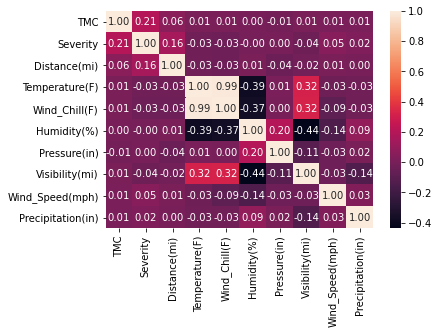

In [36]:
sns.heatmap(df_severity.corr(), annot=True, fmt= '.2f');

As we can see, there is no correlation between the severity and the weather conditions.
Some of the weather variables are correlated with each other, as expected, but not with the severity of the accident.
The variable that is most correlated with severity is the distance which represents he length of the road extent affected by the accident.

How do accidents map taking severity into account?

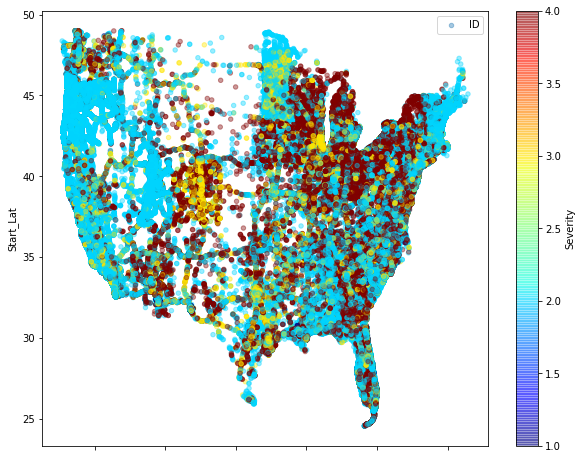

In [37]:
mapping_accidents=df.plot(kind='scatter', x='Start_Lng', y='Start_Lat',label = 'ID',c='Severity',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
mapping_accidents.legend()

NameError: name 'us_map' is not defined

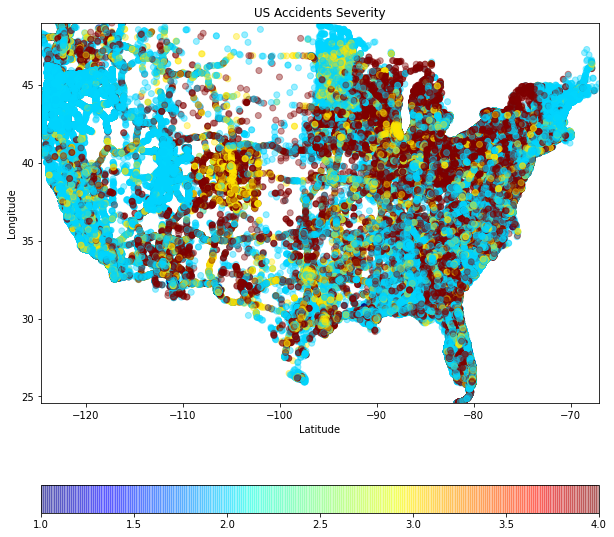

In [44]:
# description

#cm = plt.cm.get_cmap('Reds')
#cmap=cm,


fig, ax = plt.subplots(figsize = (10,10))
sc = ax.scatter(data=df, x='Start_Lng', y='Start_Lat', c='Severity', cmap=plt.get_cmap('jet'), alpha=0.4)
plt.colorbar(sc, orientation="horizontal")
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.set_ylabel('Longitude')
ax.set_xlabel('Latitude')
ax.set_title('US Accidents Severity')

ax.imshow(us_map, zorder=0, extent = map_edges_to, aspect= 'equal');

In [28]:
#Average Severity per state
state_severity = df.groupby(['State']).mean()['Severity']
top_10 = state_severity.nlargest(10)
print(top_10)

State
SD    3.311475
WY    3.125984
ND    2.772727
AR    2.736083
MT    2.693359
GA    2.655126
IA    2.635817
MO    2.633891
WI    2.630467
CT    2.621598
Name: Severity, dtype: float64


In [ ]:
#Ir buscar numero de acidentes de estes estados...Interessante
state_severity = df.groupby(['State']).mean()['Severity']
top_10 = state_severity.nlargest(10)

In [ ]:
#The States with the highest average severity are not the States with the most accidents

Text(0.5, 1.0, 'Average State Severity')

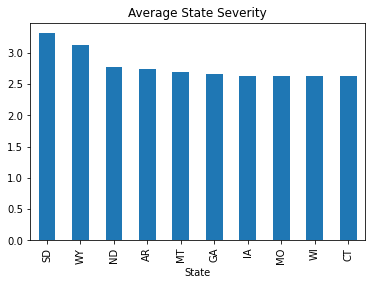

In [29]:
top_10.plot(kind="bar");
plt.title("Average State Severity")

In [33]:
#top_10_maf = df.

#Counting the states with the most severe accidents

#state_severity_3_4 = df.query("(Severity == '3' or Severity == '4')").groupby(['State'].va)

#print(state_severity_3_4)

# The below should be a bar chart of the proportion of the top 10 countries for the
# individuals in your count_vals if it is set up correctly.

#(count_vals[:20]/df.shape[0]).plot(kind="bar");
#plt.title("State");

In [ ]:
#df.